In [134]:
import pandas as pd
import numpy as np
import os

from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Import Line2D for custom legend handles


## Importing Data

In [135]:
# manually importing Student's grade
grades = pd.DataFrame({
    "Student ID": [f"S{str(i).zfill(2)}" for i in range(1, 11)],
    "Midterm 1": [78, 82, 77, 75, 67, 71, 64, 92, 80, 89],
    "Midterm 2": [82, 85, 90, 77, 77, 64, 33, 88, 39, 64],
    "Final": [182, 180, 188, 149, 157, 175, 110, 184, 126, 116],
})

# Importing Student's data stress level data from the Data Folder

# Loop through all the folders in the Data folder, for each folder loop through all the files in the folder
students = os.listdir("Data")
student_data = {}

for student_id in students:
    if student_id == ".DS_Store":
        continue

    student_path = os.path.join("Data", student_id)
    assessment_types = os.listdir(student_path)

    student_data[student_id] = {}
    student_info = student_data[student_id]

    # Read in the data for each assessment type of the student
    for assessment_type in assessment_types:
        if assessment_type == ".DS_Store":
            continue

        assessment_path = os.path.join(student_path, assessment_type)

        student_info[assessment_type] = {}
        assessment_data = student_info[assessment_type]

        assessment_files = os.listdir(assessment_path)

        for file_name in assessment_files:
            if file_name.endswith(".csv") and file_name != "tags.csv":
                file_path = os.path.join(assessment_path, file_name)
                # Read in the file as a pandas dataframe, ignoring the first row
                df = pd.read_csv(file_path, skiprows=1, header=None)

                assessment_data[file_name] = df

## Deceptive Visualizaation

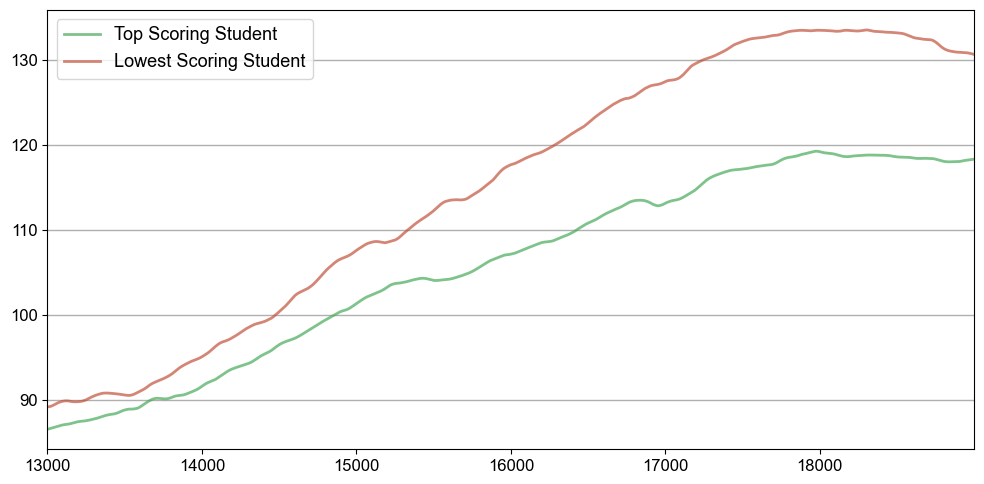

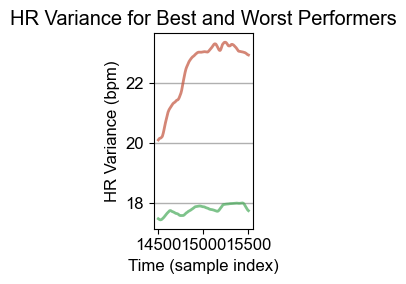

In [136]:
all_students = set(student_data.keys())

# Set the font globally
rcParams["font.family"] = "Arial"
rcParams["font.size"] = 12  # Increase default font size

# Define manually converted Oklab colors in RGB (normalized between 0-1)
oklab_best = (72 / 255, 170 / 255, 90 / 255)  # Cool green
oklab_worst = (194 / 255, 83 / 255, 60 / 255)  # Warm reddish-orange

# Assigning HR data for best (S3) and worst (S7) performers
hr_data_best = np.array(student_data["S3"]["Final"]["HR.csv"].iloc[1:, 0])
hr_data_worst = np.array(student_data["S7"]["Final"]["HR.csv"].iloc[1:, 0])

# Assign time index starting from 0
time_index_best = np.arange(len(hr_data_best))
time_index_worst = np.arange(len(hr_data_worst))

# Creating DataFrame for HR data
hr_df_best = pd.DataFrame(hr_data_best, index=time_index_best, columns=["HR"])
hr_df_worst = pd.DataFrame(hr_data_worst, index=time_index_worst, columns=["HR"])

# Selecting time range (9000-19000)
time_index = np.arange(9000, 19000)
hr_df_best = hr_df_best.loc[time_index]
hr_df_worst = hr_df_worst.loc[time_index]

# Computing rolling mean and variance
window_size = 4000
smoothed_hr_best = hr_df_best["HR"].rolling(window=window_size).mean()
smoothed_hr_worst = hr_df_worst["HR"].rolling(window=window_size).mean()
hr_var_best = hr_df_best["HR"].rolling(window=window_size).std()
hr_var_worst = hr_df_worst["HR"].rolling(window=window_size).std()

# Creating main figure for smoothed HR data
fig_main, ax_main = plt.subplots(figsize=(10, 5))  # Smaller figure
ax_main.set_title("Smoothed HR Data for Best and Worst Performers")  # Set title
ax_main.set_title("")  # Set title


# Plot smoothed HR data using manually set Oklab colors
ax_main.plot(
    smoothed_hr_best.index,
    smoothed_hr_best,
    label="Top Scoring Student",
    color=oklab_best,
    alpha=0.7,
    linewidth=2  # Set line width
)
ax_main.plot(
    smoothed_hr_worst.index,
    smoothed_hr_worst,
    label="Lowest Scoring Student",
    color=oklab_worst,
    alpha=0.7,
    linewidth=2  # Set line width
)

ax_main.set_xlim(13000, max(time_index))
ax_main.set_xlabel("Time (sample index)")  # Set x-axis label
ax_main.set_ylabel("Heart Rate (bpm)")  # Set y-axis label
ax_main.set_xlabel("")  # Set x-axis label
ax_main.set_ylabel("")  # Set y-axis label


ax_main.grid(True, which="both", axis="y", linewidth=1)
ax_main.legend(loc="upper left", fontsize=13)

plt.tight_layout()
plt.show()

# Creating inset figure for HR variance
fig_inset, ax_inset = plt.subplots(figsize=(2, 3))  # Smaller figure
ax_inset.set_title("HR Variance for Best and Worst Performers")  # Set title

# Making x-axis visually shorter
x_subset = hr_var_best.loc[14500:15500].index
ax_inset.plot(x_subset, hr_var_best.loc[x_subset], color=oklab_best, alpha=0.7, linewidth=2)  # Set line width
ax_inset.plot(x_subset, hr_var_worst.loc[x_subset], color=oklab_worst, alpha=0.7, linewidth=2)  # Set line width

# Adjusting x-axis ticks to minimize width perception
ax_inset.set_xticks([14500, 15000, 15500])
ax_inset.set_xlabel("Time (sample index)")  # Set x-axis label
ax_inset.set_ylabel("HR Variance (bpm)")  # Set y-axis label

ax_inset.grid(True, which="both", axis="y", linewidth=1)

plt.tight_layout()
plt.show()


## Earnest Visualizaation

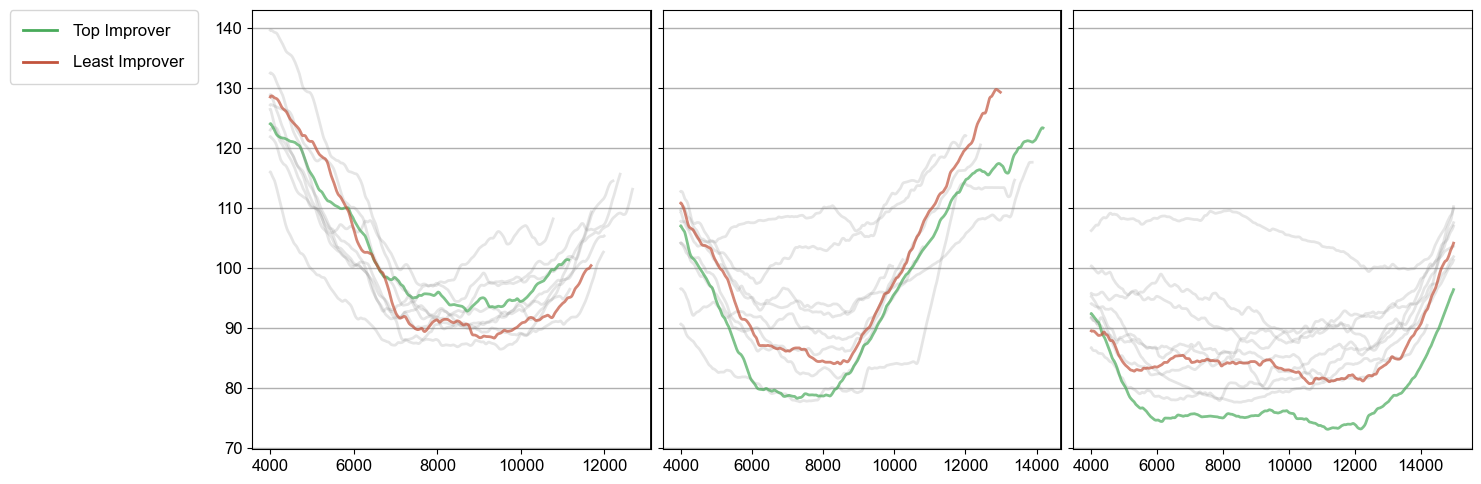

In [153]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib import rcParams


selected_students = ['S6', 'S10']  # Ensure correct IDs

# ✅ Set global font settings for better readability
rcParams["font.family"] = "Arial"
rcParams["font.size"] = 12  # Increase default font size

# ✅ Manually define Oklab-based RGB colors (normalized between 0-1)
oklab_s6 = (72 / 255, 170 / 255, 90 / 255)  # Soft Light Green for S6 (Top Improver)
oklab_s10 = (194 / 255, 83 / 255, 60 / 255)  # Deep Dark Red for S10 (Least Improver)

# ✅ Apply new colors
colors = {'S6': oklab_s6, 'S10': oklab_s10}

# ✅ Exams in chronological order
assessments = ['Midterm 1', 'Midterm 2', 'Final']
window_size = 4000
all_students = set(student_data.keys())

# ✅ Create a figure with three subplots sharing the same y-axis but independent x-axes
fig, axes = plt.subplots(1, len(assessments), figsize=(15, 5), sharey=True)

for col, assessment in enumerate(assessments):
    ax = axes[col]
    
    for student_id in all_students:
        student_info = student_data[student_id]
        assessment_data = student_info[assessment]
        
        # Compute rolling HR
        smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
        smoothed_hr = smoothed_hr[smoothed_hr.index < 15000]  # Limit to first 15000 time index
        
        # Determine color
        color = colors.get(student_id, 'gray')
        alpha = 0.7 if student_id in selected_students else 0.2  # Make other lines more transparent
        
        # Plot each exam separately with its own x-axis
        ax.plot(smoothed_hr.index, smoothed_hr, color=color, alpha=alpha, linewidth=2, label=f"{student_id} HR Signal" if col == 0 else "")

    # ✅ Set Titles and Labels
    # ax.set_title(f"{assessment}")
    # ax.set_xlabel("Time (sample index)")
    ax.grid(True, which="both", axis="y", linewidth=1)

# ✅ Set common y-label
# axes[0].set_ylabel("Heart Rate (bpm)")

# ✅ Draw black separator lines between the subplots
for i in range(len(assessments) - 1):
    x_separator = axes[i].get_xlim()[1]  # Get rightmost x-limit of each subplot
    axes[i].axvline(x=x_separator, color='black', linewidth=2)  # Draw vertical line at the edge

# ✅ Custom legend with correct Oklab-based colors
legend_handles = [
    Line2D([0], [0], color=oklab_s6, lw=2, label='Top Improver'),  # Blue-Green for S6
    Line2D([0], [0], color=oklab_s10, lw=2, label='Least Improver')  # Orange-Red for S10
]

# ✅ Adjust legend position to top-left (closer to the graph)
fig.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(-0.13, 0.98), 
           markerscale=2, fontsize=12, frameon=True, handletextpad=1, 
           borderpad=0.8, labelspacing=1)

# ✅ Reduce space between subplots & adjust legend position
plt.tight_layout()
plt.subplots_adjust(wspace=0.03, right=0.85)  # Adjust spacing & keep legend visible

# ✅ Show the plot
plt.show()